# Customer Segementation with Unsuperviesd ML method

### We are going to do the following part: 
- Feature Prepprocessing
- EDA
- K-mean Clustering 
- Cluster Analyis
- Conclusion

### 1. Loading the clean data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import json
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2
sns.set()
import helper as h

In [2]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [59]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)


The transcript_clean.csv and transcript_merge.csv file are available at local folder


In [3]:
transcript_clean = pd.read_csv("data/transcript_clean.csv")

In [4]:
profile_updated.head()

,Unnamed: 0,gender,age,became_member_on,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,...,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio
0,68be06ca386d4c31939f3a4f0e3dd783,NaN,118,2017-02-12,NaN,0.0,0.0,0.0,0.0,1.0,...,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714
1,0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
2,38fe809add3b4fcf9315a9694bb96ff5,NaN,118,2018-07-12,NaN,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333
4,a03223e636434f42ac4c3df47e8bac43,NaN,118,2017-08-04,NaN,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


In [5]:
transcript_clean.head()

,Unnamed: 0,person,event,value,time,offer_id,amount,gender,age,became_member_on,...,reward,difficulty,duration,offer_type,name,web,email,mobile,social,invalid
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,...,5.0,5.0,7.0,bogo,bogo_5_5_7,1.0,1.0,1.0,0.0,0.0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,118,2017-08-04,...,5.0,20.0,10.0,discount,discount_20_5_10,1.0,1.0,0.0,0.0,0.0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,...,2.0,10.0,7.0,discount,discount_10_2_7,1.0,1.0,1.0,0.0,0.0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,118,2017-09-25,...,2.0,10.0,10.0,discount,discount_10_2_10,1.0,1.0,1.0,1.0,0.0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,118,2017-10-02,...,10.0,10.0,5.0,bogo,bogo_10_10_5,1.0,1.0,1.0,1.0,0.0


## Feature Preprocessing 

### Missing in colums

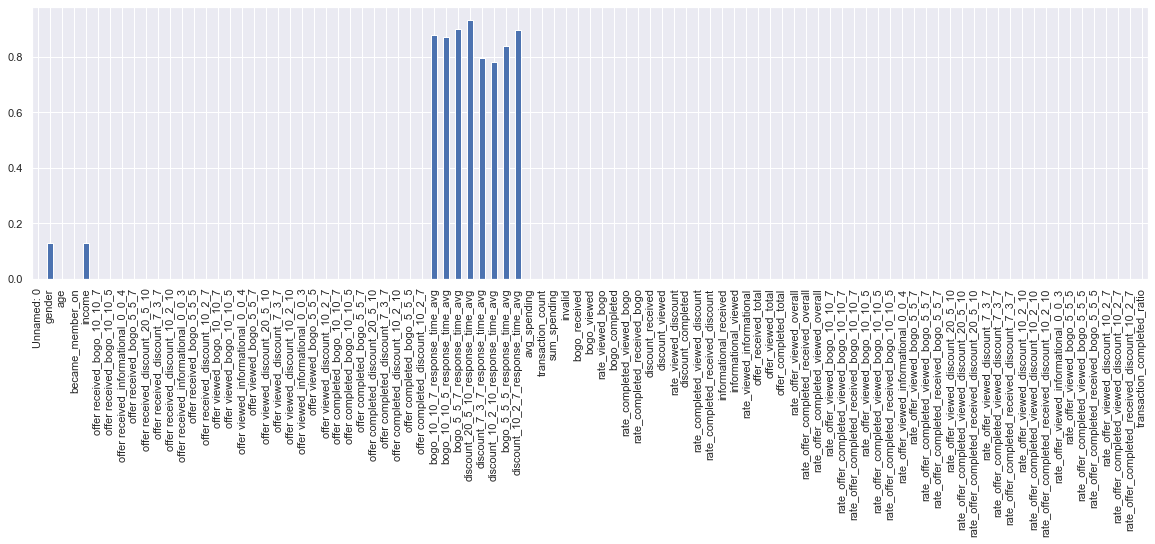

In [6]:
col_null = profile_updated.isnull().sum()
col_null_frac = col_null / profile_updated.shape[0]

plt.figure(figsize= (20,5))
col_null_frac.plot(kind='bar')

In [7]:
col_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
col_drop

['bogo_10_10_7_response_time_avg',
 'bogo_10_10_5_response_time_avg',
 'bogo_5_5_7_response_time_avg',
 'discount_20_5_10_response_time_avg',
 'discount_7_3_7_response_time_avg',
 'discount_10_2_10_response_time_avg',
 'bogo_5_5_5_response_time_avg',
 'discount_10_2_7_response_time_avg']

In [8]:
profile_updated_ = profile_updated.drop(col_drop, axis=1)

# copy profile with response time 
profile_response_time = profile_updated.copy()

### Missing in rows

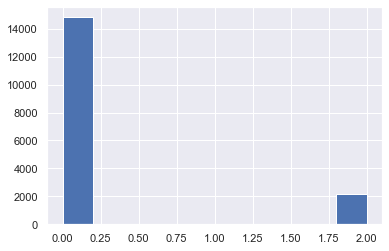

In [9]:
row_null = profile_updated_.isnull().sum(axis = 1)
row_null.hist()

In [10]:
def dist_compare_cont(feature, data):
    row_null = data.isnull().sum(axis = 1)
    f, (ax1, ax2) = plt.subplots(1,2 , sharex = True, figsize = (8, 3))
    ax1 = data[row_null == 0][feature].hist( ax = ax1, bins = 20)
    ax2 = data[row_null >0 ][feature].hist(ax = ax2, bins = 20)
    ax1.set_title("No missing data")
    ax2.set_title("With missing data")
    f.suptitle("Feature: " + feature)
    f.tight_layout()
    f.subplots_adjust(top=0.8)


C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


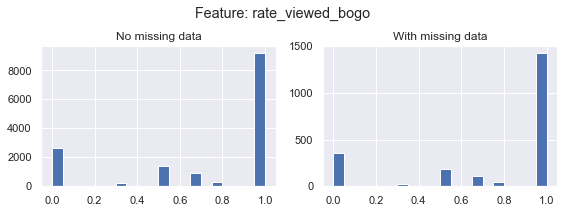

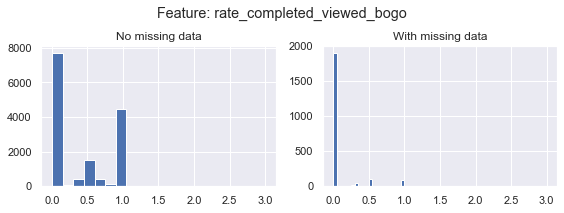

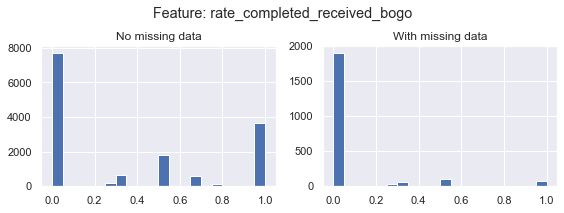

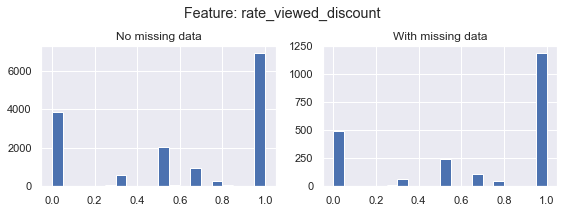

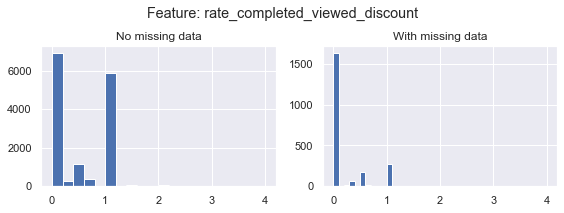

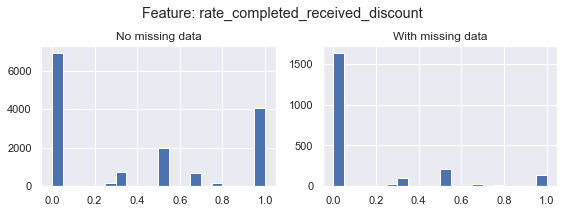

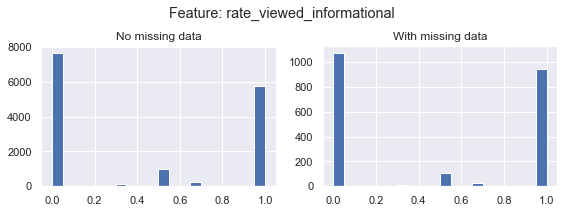

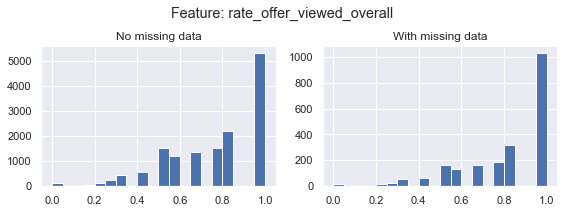

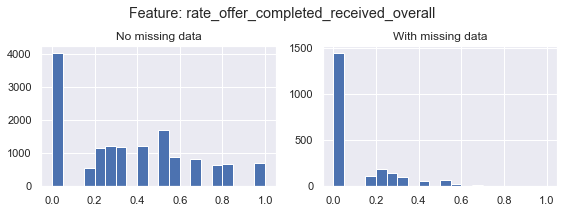

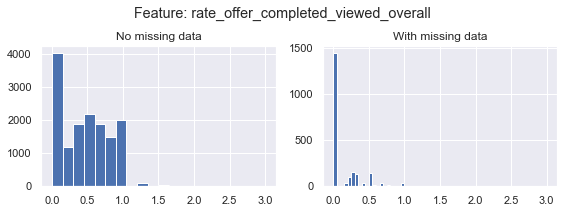

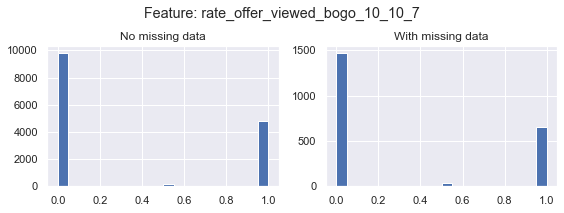

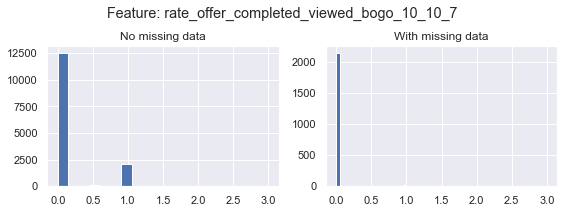

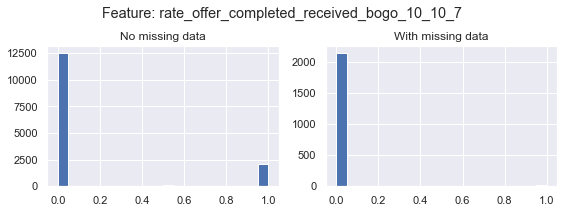

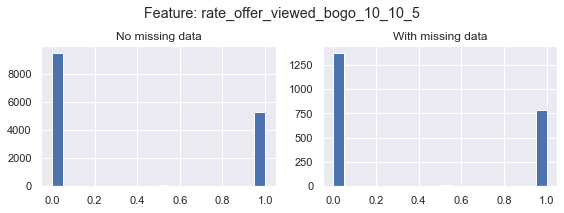

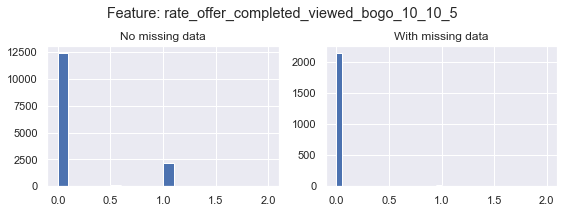

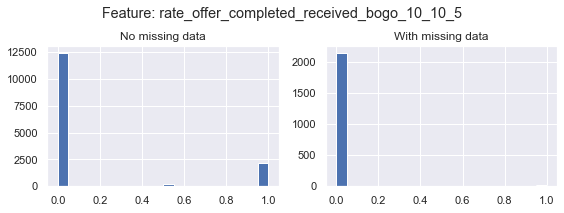

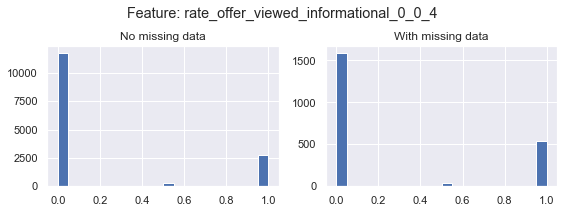

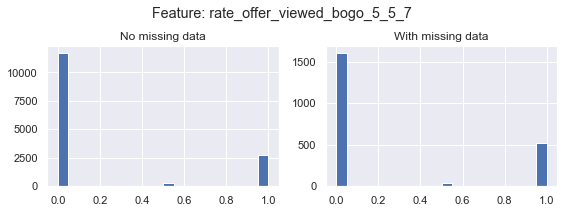

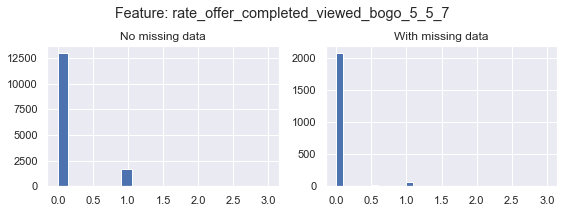

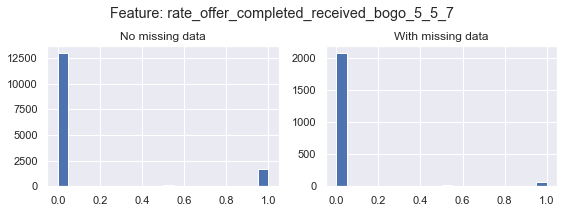

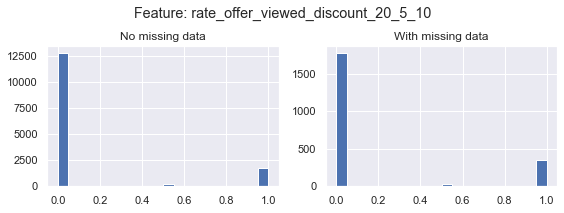

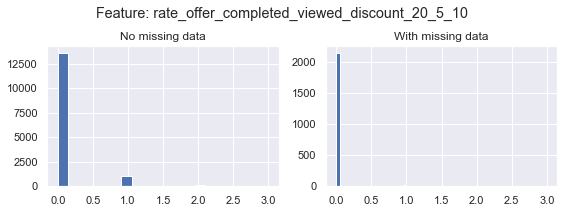

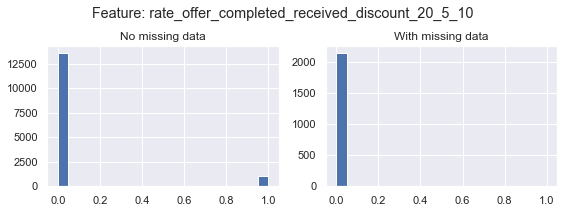

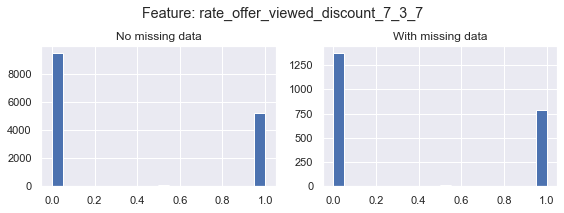

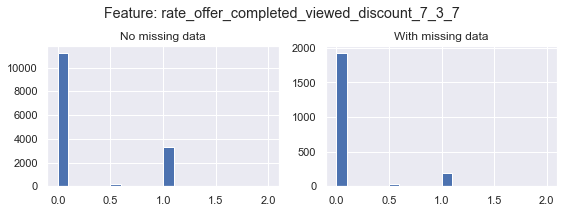

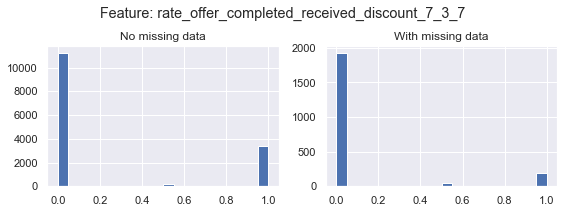

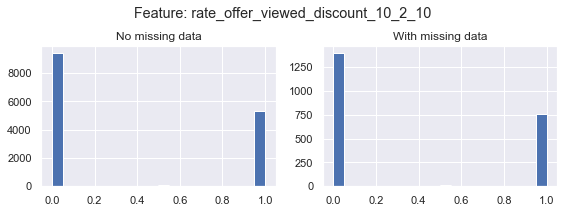

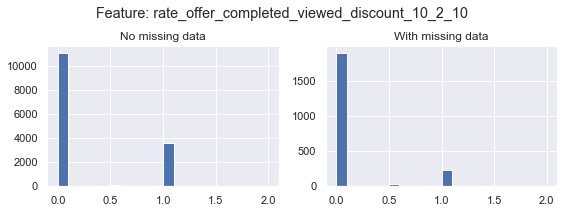

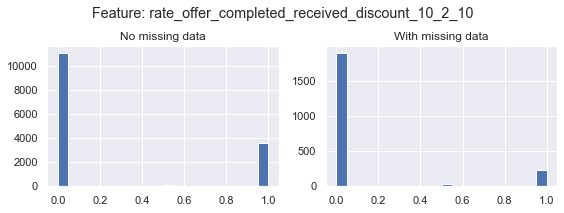

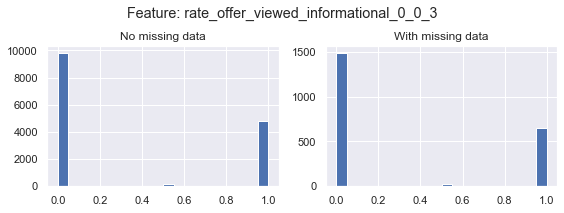

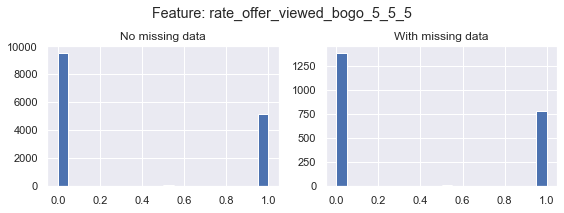

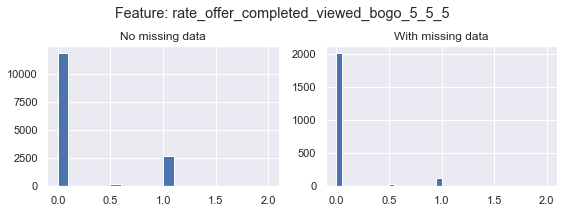

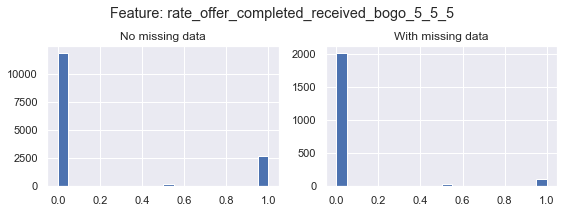

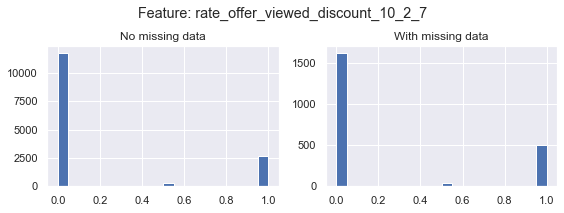

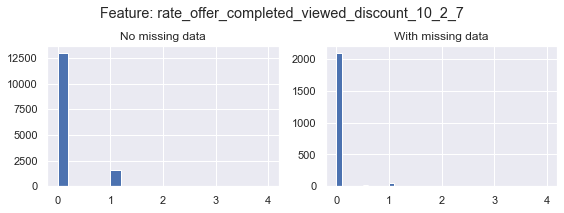

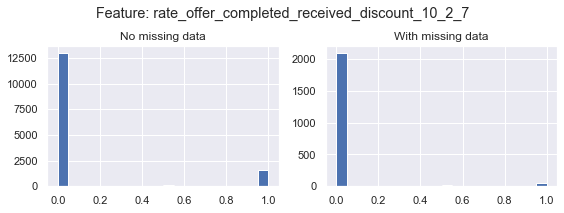

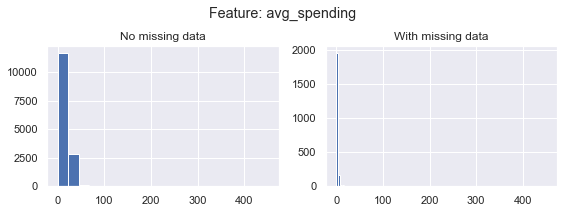

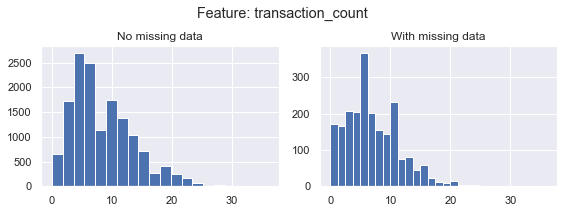

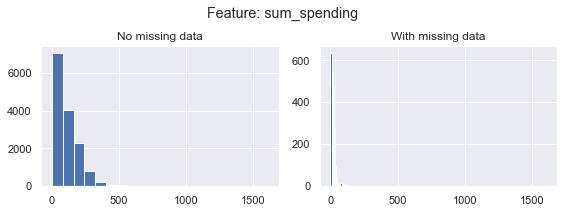

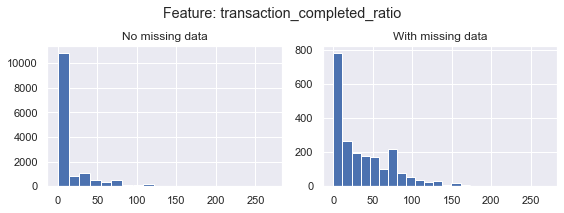

In [12]:
cols_to_compare = profile_updated.columns[profile_updated.columns.str.contains("rate")].to_list() +\
                  ['avg_spending', 'transaction_count', 'sum_spending','transaction_completed_ratio']

for col in cols_to_compare:
    dist_compare_cont(col,profile_updated_)
    

Plots for data with and without missing are quite different, so we will kepp them seperate when doing clustering

In [24]:
"""seperate data with age <100 and age >= 100"""
profile_updated_main = profile_updated_[profile_updated_.age <100]

profile_updated_special = profile_updated_[profile_updated_.age >= 100]
profile_updated_special = profile_updated_special.drop(['gender', 'age', 'income'], axis = 1)



### Profile with valid and invaild offer completed transacript
- Profile_valid = people who was influenced by offering
- Profile_invalid = people who was not influenced by offering( value > 0, which means how many transaction they made as invaild offer completed without viewed

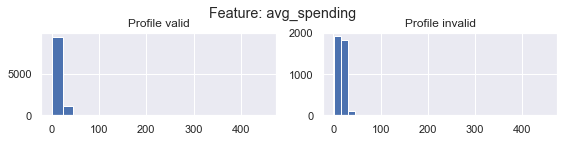

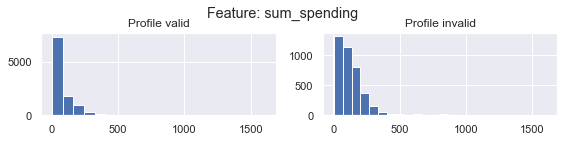

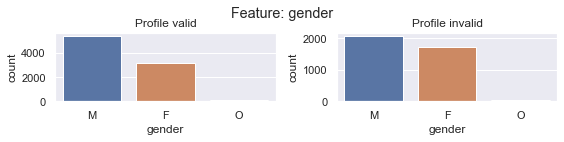

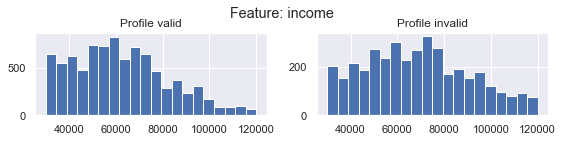

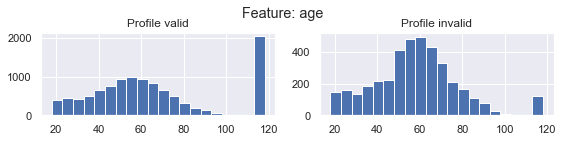

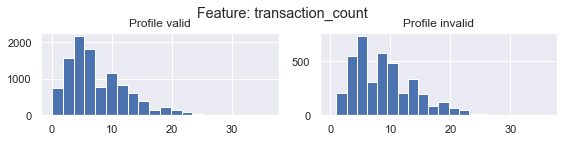

In [18]:
profile_invalid = profile_updated[profile_updated.invalid == 1]
profile_valid = profile_updated[profile_updated.invalid == 0]


cols_to_compare = [ 'avg_spending','sum_spending', 'gender','income', 'age', 'transaction_count']

for col in cols_to_compare:
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,2), sharex=True)
    if col == 'gender':
        ax1 = sns.countplot(col, data=profile_valid, ax=ax1, order=['M','F', 'O'])
        ax2 = sns.countplot(col, data=profile_invalid, ax=ax2, order=['M','F', 'O'])
    else:
        ax1 = profile_valid[col].hist(ax=ax1, bins=20)
        ax2 = profile_invalid[col].hist( ax=ax2, bins=20)
    ax1.set_title('Profile valid')
    ax2.set_title('Profile invalid')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.8)

For the invaild profile:
- Gender: female are larege than valid
- Spending: larger than valid
- Income: slight higher than valid

In [46]:
def profile_parse_dates(profile_df):
    profile_df = profile_df.copy()

    #convert to string
    profile_df['became_member_on'] = profile_df.became_member_on.apply(lambda x: str(x))
    #convert to datetime format
    profile_df['became_member_on'] = pd.to_datetime(profile_df.became_member_on)
    return profile_df


profile_updated_main = profile_parse_dates(profile_updated_main)
profile_updated_special =profile_parse_dates(profile_updated_special)

In [48]:
import datetime

for df in [profile_updated_main, profile_updated_special]:
    df.loc[:,'member_days_since'] = (datetime.datetime(2020,12,31) - df.became_member_on).dt.days 
    df.loc[:,'member_year'] = df.became_member_on.dt.year.astype(str)
    
profile_updated_main = profile_updated_main.drop('became_member_on', axis = 1)
profile_updated_special = profile_updated_special.drop('became_member_on', axis = 1)

In [49]:
profile_updated_main.head()

,Unnamed: 0,gender,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,...,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,member_days_since,member_year
1,0610b486422d4921ae7d2bf64640c50b,F,55,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,1265,2017
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333,1332,2017
5,e2127556f4f64592b11af22de27a7932,M,68,70000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.428571,980,2018
8,389bc3fa690240e798340f5a15918d5c,M,65,53000.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.588235,1056,2018
12,2eeac8d8feae4a8cad5a6af0499a211d,M,58,51000.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.636364,1146,2017


In [55]:
profile_onehot_main = pd.get_dummies(profile_updated_main)
profile_onehot_special = pd.get_dummies(profile_updated_special)

In [56]:
def separate_profile(profile_updated_df):

    #main profile
    profile_updated_main = profile_updated_df[profile_updated_df.age < 100]

    #special profile
    profile_updated_sp = profile_updated_df[profile_updated_df.age >= 100]
    profile_updated_sp = profile_updated_sp.drop(['gender', 'income', 'age'], axis=1)
    
    return profile_updated_main, profile_updated_sp

In [57]:
def encode_member_day(profile_updated_df):

    profile_updated_df = profile_updated_df.copy()
    profile_updated_df['member_days_since'] = (datetime.datetime(2020,12,31) - profile_updated_df.became_member_on).dt.days 
    profile_updated_df['member_year'] = profile_updated_df.became_member_on.dt.year.astype(str)
    profile_updated_df = profile_updated_df.drop('became_member_on', axis=1)
    return profile_updated_df


In [62]:
def feature_preprocessing(profile_updated_df, transcript_all_df, portfolio_df):

    #drop features that have more than 50% missing values
    col_null = profile_updated_df.isnull().sum()
    col_null_frac = col_null / profile_updated_df.shape[0]
    cols_to_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
    profile_updated_df = profile_updated_df.drop(cols_to_drop, axis=1)
    
    # remove row data that have age > 100 years, missing values on income and gender
    profile_updated_main, profile_updated_sp = separate_profile(profile_updated_df)
    
    # re-encode became_member_on to member_day (how may days since become member from 31 dec 2018)
    profile_updated_clean = encode_member_day(profile_updated_main)
    profile_updated_sp = encode_member_day(profile_updated_sp)
    
    # one-hot the categorical features
    profile_onehot_main = pd.get_dummies(profile_updated_clean)
    profile_onehot_sp = pd.get_dummies(profile_updated_sp)

    return profile_onehot_main, profile_onehot_sp

In [60]:
profile_dummy = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)


The profile_updated.csv file is available at local folder.


In [63]:
profile_main, profile_sp = feature_preprocessing(profile_dummy, transcript_all, portfolio)


### EDA

Text(0.5, 1.0, 'Profile Main Feature Correlation')

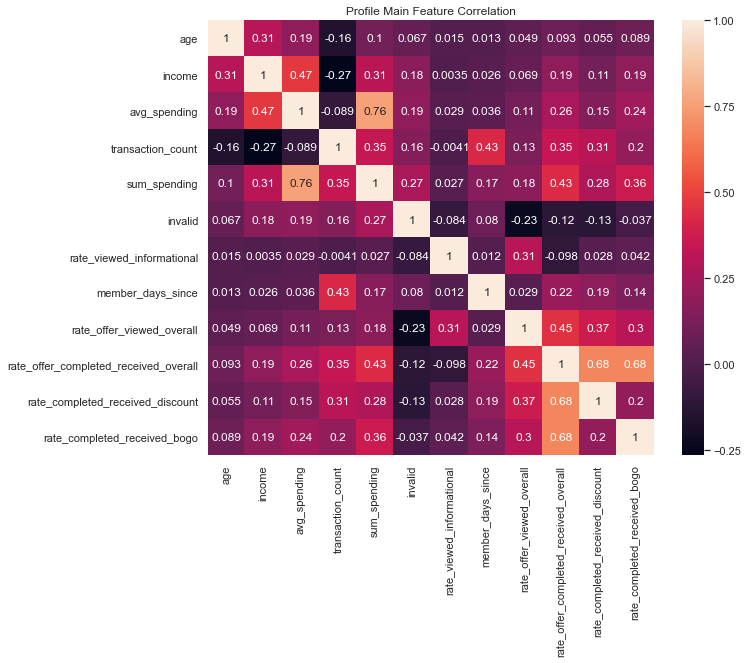

In [68]:

cols = ['age', 'income',  'avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']
plt.figure(figsize = (10,8))
sns.heatmap(profile_main[cols].corr(), annot=True)
plt.title("Profile Main Feature Correlation")

- income is positively correlated with 'avg_spending', "sum_spending" and 'age'
- invalid profile is positively correlated with income, avg&sum_spending, but negatively correlated with 'rate_offer_viewed_overall'. These people are likely keep buying when they didn't received offer.

Text(0.5, 1.0, 'Profile Special - Features Correlation')

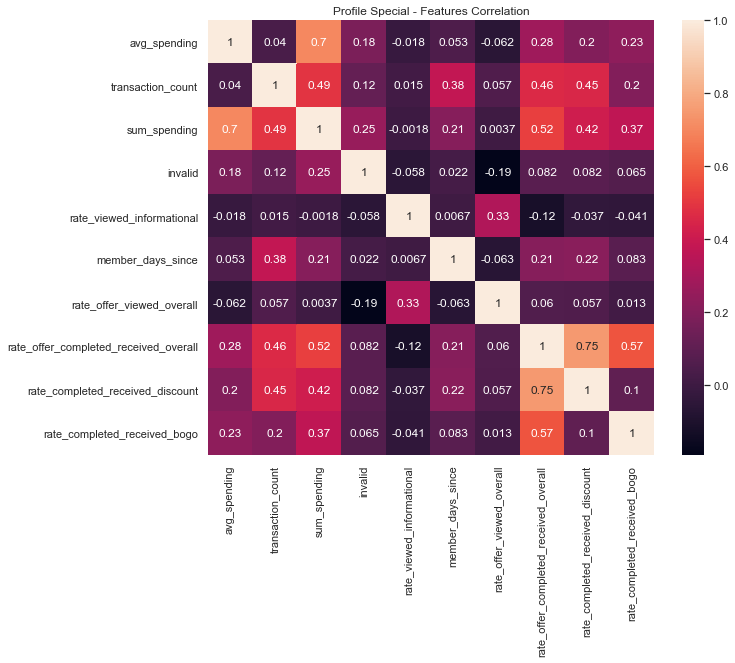

In [69]:
cols_sp = ['avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_sp[cols_sp].corr(), ax=ax, annot=True)
ax.set_title("Profile Special - Features Correlation")

In [82]:

main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_melt = merge_df[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='vals')

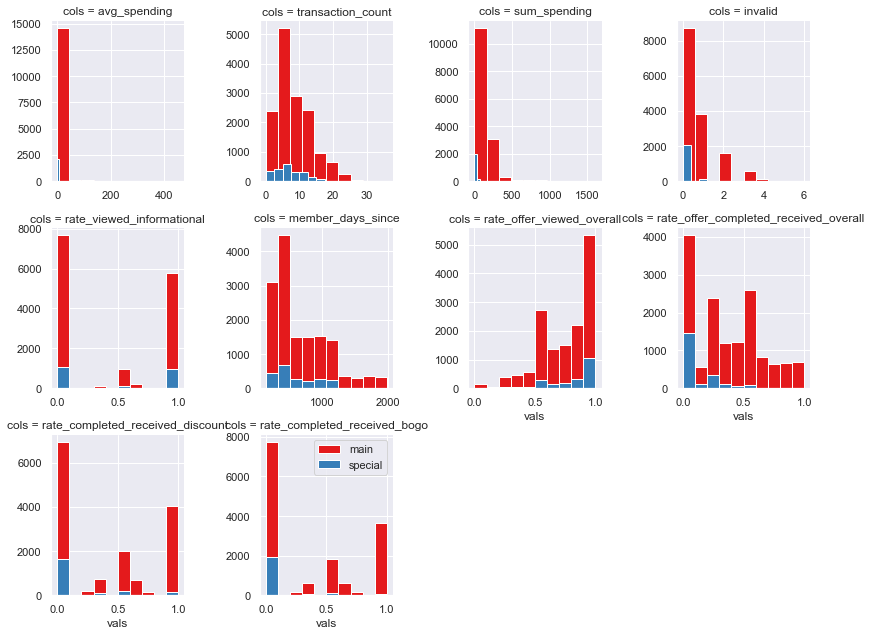

In [87]:
g = sns.FacetGrid(merge_melt, col='cols', hue="profile", palette="Set1",  col_wrap= 4,sharey=False, sharex=False)
g = (g.map(plt.hist, "vals"))
g.axes[-1].legend()
plt.show()

In [91]:
merge_melt

,profile,col,std_vals
0,main,avg_spending,0.770658
1,main,avg_spending,0.588319
2,main,avg_spending,0.368952
3,main,avg_spending,-0.074841
4,main,avg_spending,-0.589787
...,...,...,...
169995,special,rate_completed_received_bogo,1.637319
169996,special,rate_completed_received_bogo,-0.789590
169997,special,rate_completed_received_bogo,-0.789590
169998,special,rate_completed_received_bogo,-0.789590


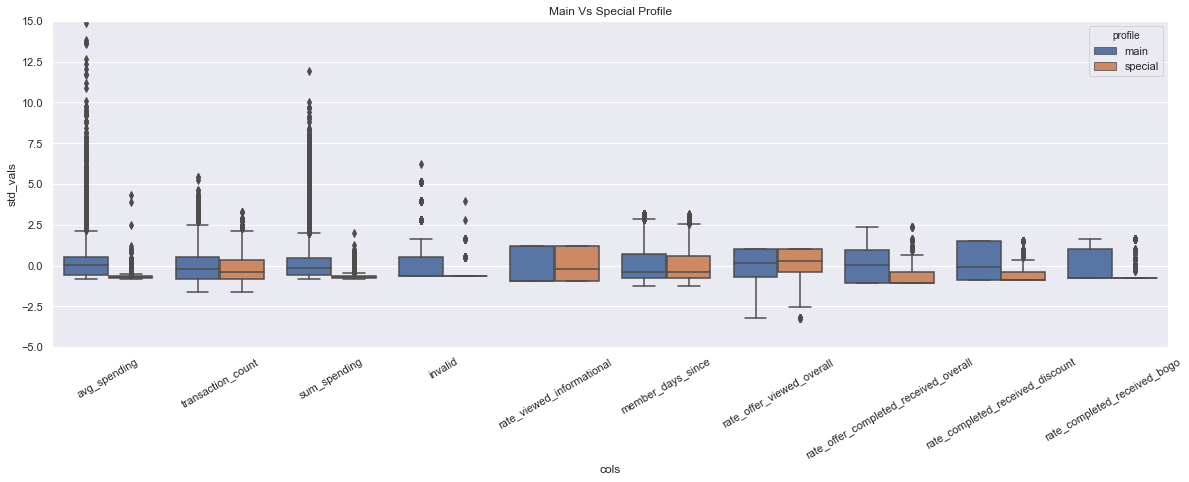

In [93]:
main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_df_std = (merge_df[cols_sp] - merge_df[cols_sp].mean()) / merge_df[cols_sp].std()
merge_df_std['profile'] = merge_df['profile']
merge_melt = merge_df_std[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=merge_melt, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title('Main Vs Special Profile');

